In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_coordinates():
    h_hole_distance = [15]+[20]*11
    h_cumulative_hole_distance = [np.sum(h_hole_distance[:i+1]) for i in range(len(h_hole_distance))]
    v_hole_distance = [5]+[20]*14
    v_cumulative_hole_distance = [np.sum(v_hole_distance[:i+1]) for i in range(len(v_hole_distance))]
    return h_cumulative_hole_distance, v_cumulative_hole_distance

def draw_home_wall():
  # wandpanele
  for base_h in [0,150]:
    plt.plot([0,250,250,0,0],np.array([0,0,150,150,0])+base_h,color="k",linewidth=1.5,zorder=1)
  # doka tafeln einzeln
  for base_h in [0,50,100,150,200,250]:
    plt.plot([0,250,250,0,0],np.array([0,0,50,50,0])+base_h,color="grey",linewidth=.75,zorder=0)
  # schrauben
  h_cumulative_hole_distance, v_cumulative_hole_distance = get_coordinates()
  for base_h in v_cumulative_hole_distance:
    plt.scatter(h_cumulative_hole_distance,[base_h]*len(h_cumulative_hole_distance),marker="o",s=2,color="grey")
  # coordinaten
  alphabeth = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  for i,h in enumerate(h_cumulative_hole_distance):
    plt.text(h,310,alphabeth[i],va="center",ha="center")
    plt.text(h,-10,alphabeth[i],va="center",ha="center")
  for i,v in enumerate(v_cumulative_hole_distance):
    plt.text(-10,v,f"{i+1}",va="center",ha="center")
    plt.text(260,v,f"{i+1}",va="center",ha="center")

def get_plot_coords(wall_coords):
  alphabeth = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  y_idx = int(wall_coords.split("-")[0])-1
  x_idx = alphabeth.find(wall_coords.split("-")[1])
  h_cumulative_hole_distance, v_cumulative_hole_distance = get_coordinates()
  return h_cumulative_hole_distance[x_idx],v_cumulative_hole_distance[y_idx]

def draw_hold(wall_coords, color, size, alpha=1):
  if size == "L":
    s = 200
  else:
    s = 60
  if color == "b":
    color = "#4169E1"
  elif color == "mint":
    color = "#3EB489"
  elif color == "neon":
    color = "#FFFF33"
  plt.scatter(*get_plot_coords(wall_coords),color=color,edgecolor="k",s=s,linewidth=1)
  plt.scatter(*get_plot_coords(wall_coords),color="w",linewidth=0,s=s+30,alpha=1-alpha)
  return

def draw_all_holds():

    h_cumulative_hole_distance, v_cumulative_hole_distance = get_coordinates()
    griffe = get_holds()
    # griffe plotten
    for wall_coords, [color, size] in griffe.items():
      draw_hold(wall_coords, color, size, alpha=.3)
      # print(coords,color,size)

def get_holds():
  griffe = {
      "15-B": ["w","L"], "15-E": ["r","L"], "15-H": ["k","L"], "15-K": ["r","L"],
      "14-D": ["b","S"], "14-I": ["b","S"],
      "13-B": ["b","S"], "13-G": ["b","S"], "13-K": ["b","S"],
      "12-C": ["w","L"], "12-E": ["b","S"], "12-G": ["r","L"], "12-L": ["k","L"],
      "11-A": ["k","L"], "11-C": ["b","S"], "11-D": ["y","L"], "11-H": ["b","S"], "11-J":["b","S"],
      "10-F": ["b","S"], "10-K": ["k","L"],
      "9-A": ["b","S"], "9-B": ["b","S"], "9-D": ["b","S"], "9-H":["b","S"], "9-K":["b","S"],
      "8-A": ["b","S"], "8-B": ["r","L"], "8-D": ["mint","L"], "8-E":["b","S"], "8-G": ["b","S"], "8-I": ["b","S"], "8-J":["b","S"],
      "7-B": ["b","S"], "7-E": ["r","L"], "7-G": ["b","S"], "7-H": ["g","L"], "7-J":["m","S"],"7-K":["grey","S"],"7-L": ["b","S"],
      "6-A": ["b","S"], "6-C": ["b","L"], "6-D": ["b","S"], "6-F": ["b","S"], "6-H": ["b","S"], "6-I": ["b","S"],"6-K": ["b","S"],
      "5-B": ["b","S"], "5-E": ["b","S"], "5-F": ["b","L"], "5-G": ["b","S"], "5-J": ["b","S"], "5-L": ["b","S"],
      "4-A": ["b","S"], "4-D": ["b","S"], "4-F": ["b","S"], "4-H": ["b","S"], "4-I": ["w","L"], "4-K": ["b","S"],
      "3-C": ["g","S"], "3-E": ["b","S"], "3-G": ["neon","S"], "3-I": ["b","S"], "3-K": ["b","S"], "3-L": ["b","S"],
      "2-B": ["b","S"], "2-F": ["b","S"], "2-J": ["b","S"],
      "1-A": ["b","S"], "1-C": ["b","S"], "1-H": ["b","S"], "1-L": ["b","S"],
    }
  return griffe

In [3]:
routes = {
    "Potential 6C": {
        "grade": "6C",
        "tag": "light blue",
        "comment": "",
        "start": ["6-C","5-F"],
        "top": ["15-B"],
        "hands": ["10-F","12-C","13-G"],
        "feet": ["2-B","2-F"]
    }
}

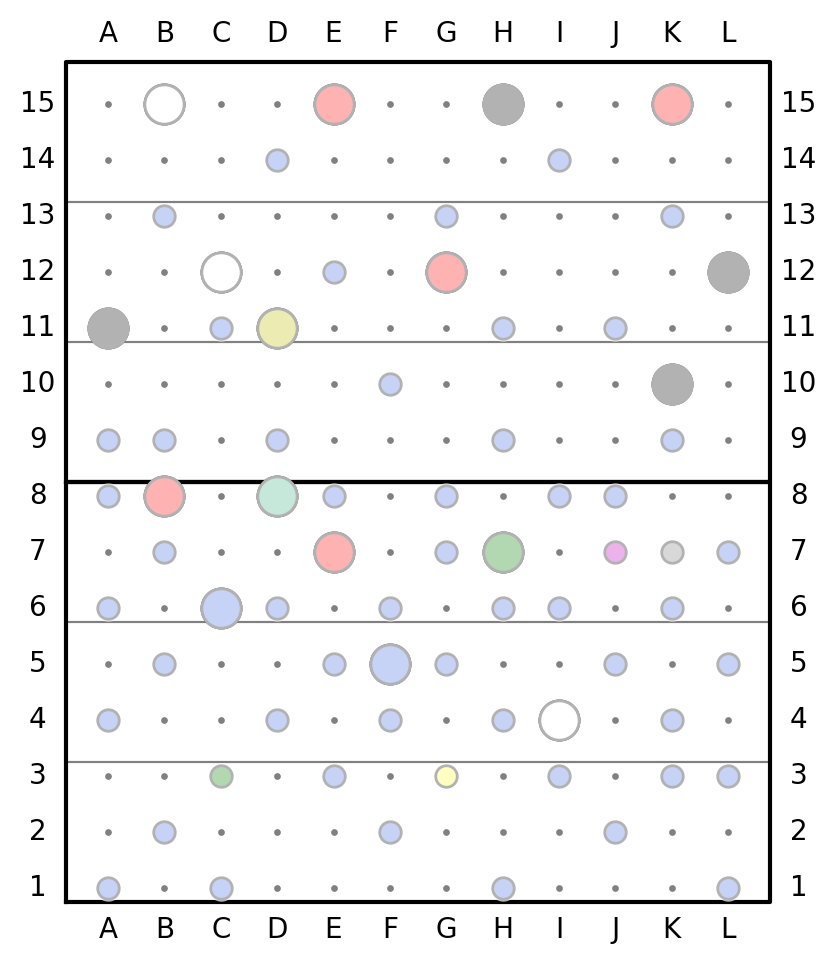

In [4]:
plt.figure(dpi=200,figsize=(5,6))
plt.axis("off")
draw_home_wall()
draw_all_holds()

plt.show()

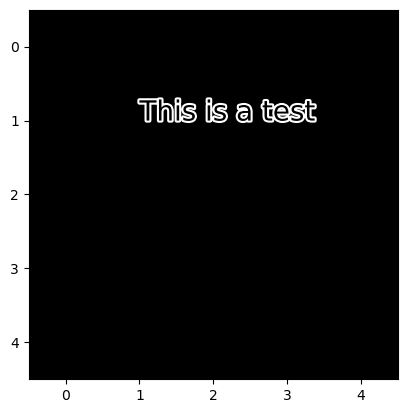

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

plt.imshow(np.zeros((5,5)), cmap=plt.gray())
txt = plt.text(1,1,'This is a test', size=20, color='black')
txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])
plt.draw()